<a href="https://www.kaggle.com/code/aisuko/image-to-image-using-controlnet?scriptVersionId=164609278" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Overview

Image-to-image is pass an initial image as a starting point for the diffusion process rather than a prompt in text-to-image. The initial image is encoded to latent space and noise is added to it. Then the latent diffusion model takes a prompt and the noisy latent image predicts the added noise, and removes the predicted noise form the initial latent image to get the new latent image. Lastly, a decoder decodes the new latent image back into an image.

![](https://cdn.masto.host/sigmoidsocial/media_attachments/files/112/005/980/733/819/946/small/50d30cfbdc90101f.png)

In [1]:
%%capture
!pip install diffusers==0.23.1

## ControlNet

ControlNets provide a more flexible and accurate wat to control image generation because you can use an additional conditioning image. The conditioning image can be a canny image, depth map, images segmentation, and even scribbles! Whatever type of conditioning image you choose, the Controlnet generates an image that preserves the information in it.

In [2]:
import torch
from diffusers import AutoPipelineForImage2Image, ControlNetModel
from diffusers.utils import load_image, make_image_grid

controlnet=ControlNetModel.from_pretrained("lllyasviel/control_v11f1p_sd15_depth", torch_dtype=torch.float16, variant="fp16", use_safetensors=True)

pipeline =AutoPipelineForImage2Image.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnet,
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
).to("cuda")

pipeline.enable_model_cpu_offload()

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [3]:
image_url="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/img2img-init.png"
init_image=load_image(image_url)
init_image=init_image.resize((958,960)) # Note: Be sure the images have the same dimensions

depth_image=load_image("https://huggingface.co/lllyasviel/control_v11f1p_sd15_depth/resolve/main/images/control.png")
depth_image=depth_image.resize((958,960))

  0%|          | 0/40 [00:00<?, ?it/s]

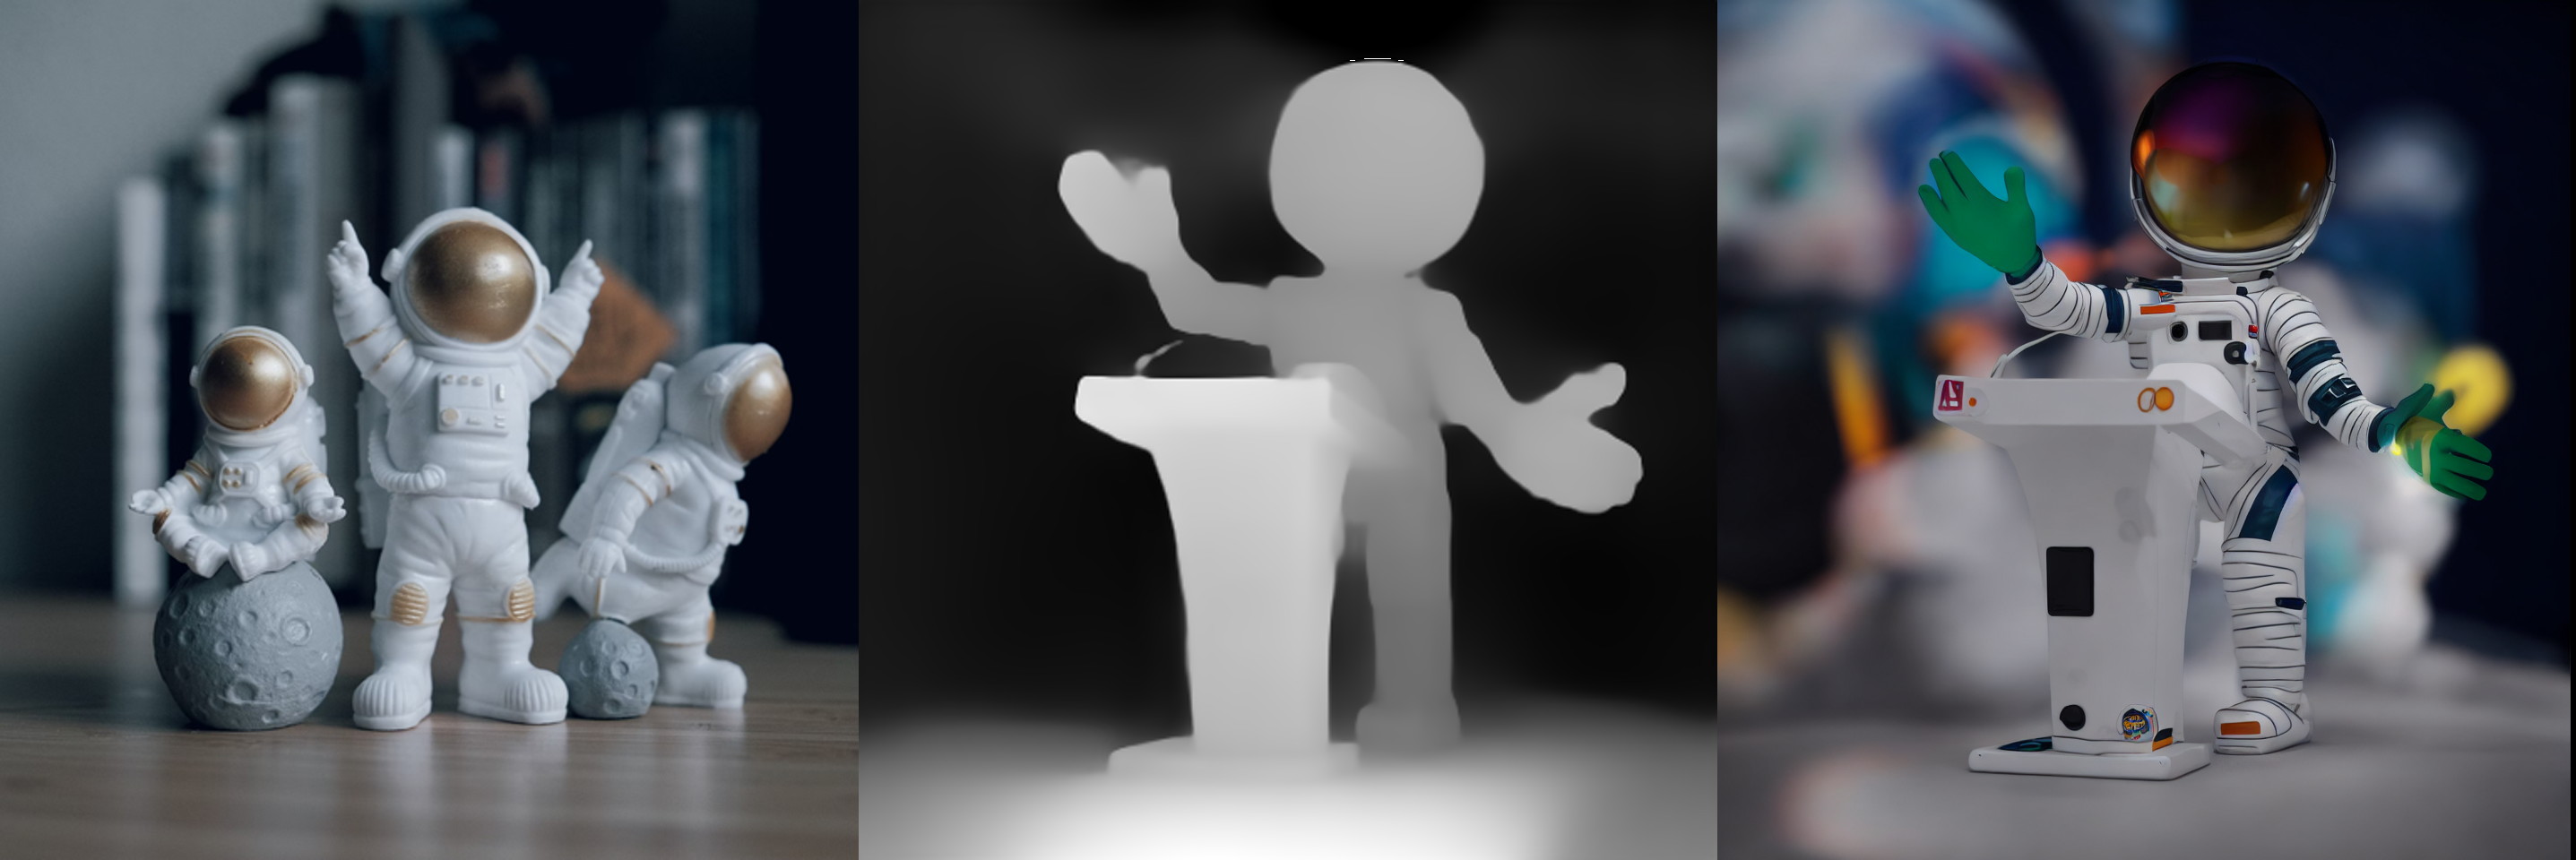

In [4]:
prompt="Astronaut in Melbourne city, warm color palette, 8K"
negative_prompt="bad, ugly"
image_control_net=pipeline(prompt, negative_prompt=negative_prompt, image=init_image, control_image=depth_image).images[0]
make_image_grid([init_image, depth_image, image_control_net], rows=1, cols=3)

# Conclusion

I used to create QR Code by using Stable Diffusion with AUTOMATIC1111 on Apple Silicon. The project is an awesome open-source project, but the diffusion process is slow on macOS. All the ML is hard on Apple Silicon. Here we can use SD, ControlNet with diffusers in Kaggle and it is also support Apple Silicon. Furthermore, be sure the images have same dimensions.

And be careful to choice the images to be used by ControlNet.